# Assignment 4: Block Matching and Harris Corner Detection
## Ex. 4.1 Dense Optical Flow by Block Matching
* implement the block matching method as shown in the lecture
* take two frames from the datasets "lane_detection" or "racecar" with variable distances in time (1, 2, x) and compute the vector flow field
* display a subset of flow vectors on the gray-value version of the first image, by drawing a respective line. adjust the grid density such that not too many vectors overlap (**RESULT**)

start
image_width 640
image_height 480
image_width 640
image_height 360
7323.623337481327


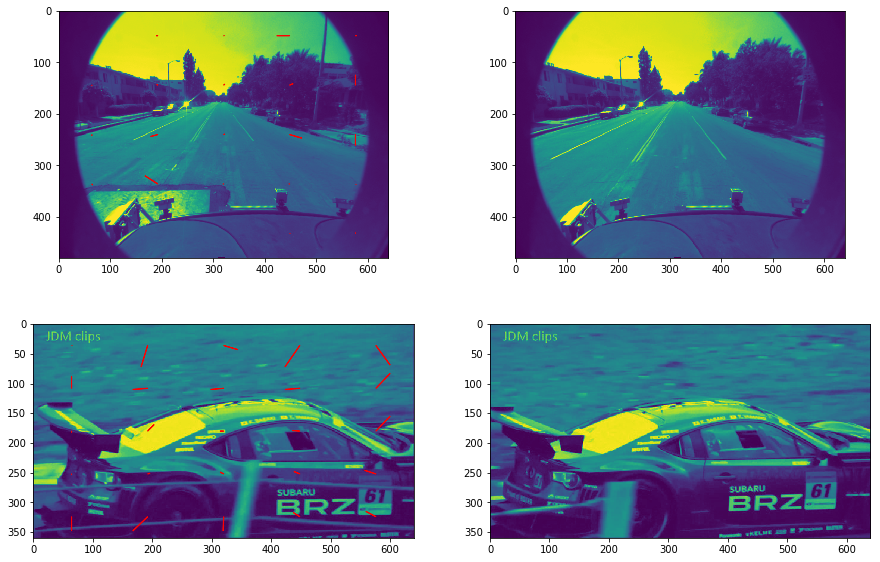

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io, data, feature, color
import numpy as np
import math

def sumSquaredDiff(block1, block2):
    diff = 0

    for x in range(block1.shape[0]):
        for y in range(block1.shape[1]):
            try:
                diff += (block1[x][y] - block2[x][y])**2
            except IndexError:
                pass # print("Rand erreicht")                
    return diff

def findMatch(block, blockLeft, newImage):
    # for lane, 50px neighbourhood
    neighbourhood = 25
    blockWidth = block.shape[1]
    blockHeight = block.shape[0]
    blockCenter = (blockLeft[0] + int(round(blockWidth/2)), 
                   blockLeft[1] + int(round(blockHeight/2)))
    
    minDif = math.inf
    match =  blockCenter
    
    neighbourhoodStartX = max(0, blockLeft[0] -  neighbourhood)
    neighbourhoodStartY = max(0, blockLeft[1] -  neighbourhood)
    
    for x in range(neighbourhood+neighbourhood):
        for y in range(neighbourhood+neighbourhood): # todo Bild cap
            ##oberer Rand, unterer Rand, linkerRand, rechter Rand
            currentNewLeft = (neighbourhoodStartX+x, neighbourhoodStartY+y)        
            currentNewBlock = newImage[currentNewLeft[1]:currentNewLeft[1]+blockHeight,
                                       currentNewLeft[0]: currentNewLeft[0]+blockWidth]
            newDiff = sumSquaredDiff(block, currentNewBlock)
            if newDiff < minDif:
                minDif = newDiff
                currentNewCenter = (currentNewLeft[0] + int(round(blockWidth/2)), 
                                    currentNewLeft[1] + int(round(blockHeight/2)))
                match = currentNewCenter
    
    return match

def blockMatching(oldImage, newImage, out=plt):
    image_width = oldImage.shape[1]
    countBlocksX = 5
    blockSizeX = int(math.floor(image_width/countBlocksX))

    image_height = oldImage.shape[0]
    countBlocksY = 5
    blockSizeY = int(math.floor(image_height/countBlocksY))
    print("image_width", image_width)
    print("image_height", image_height)

    for currentBlockX in range(countBlocksX):
        x = currentBlockX * blockSizeX
        for currentBlockY in range(countBlocksY): 
            y = currentBlockY * blockSizeY
            block = oldImage[y:y+blockSizeY, x:x+blockSizeX] #oberer Rand, unterer Rand, linkerRand, rechter Rand
            centerOldX, centerOldY = (x+blockSizeX//2, y+blockSizeY//2)
            centerOfMatchX, centerOfMatchY = findMatch(block, (x, y), newImage)
            dx, dy = (centerOfMatchX-centerOldX, centerOfMatchY - centerOldY)
            out.add_patch(
                patches.Arrow(centerOldX, centerOldY, dx, dy, edgecolor="red")
            )
            
def m():

    # chose other images if you like
    lane1 = io.imread('images/lane_detection/f00000.png')
    lane2 = io.imread('images/lane_detection/f00001.png')

    car1 = io.imread('images/racecar/100.jpeg')
    car2 = io.imread('images/racecar/102.jpeg') 

    fig = plt.figure(figsize=(15, 10))
    ax11 = plt.subplot(2, 2, 1)
    ax12 = plt.subplot(2, 2, 2)
    ax21 = plt.subplot(2, 2, 3)
    ax22 = plt.subplot(2, 2, 4)
    print("start")

    lane1 = color.rgb2gray(lane1)
    lane2 = color.rgb2gray(lane2)


    blockMatching(lane1, lane2, ax11)
    
    car1 = color.rgb2gray(car1)
    car2 = color.rgb2gray(car2)

    blockMatching(car1, car2, ax21)

    ax11.imshow(lane1)
    ax12.imshow(lane2)

    ax21.imshow(car1)
    ax22.imshow(car2)
    
if __name__ == '__main__':
    import timeit
    print(timeit.timeit("m()", setup="from __main__ import m", number=1))




## Ex. 4.2 Harris Corner Detection
* implement the Harris Corner Detector as discussed in the lecture
* compute corners in the first image and track them with Lucas-Kanade (use e.g. the function "calcOpticalFlowPyrLK" in OpenCV)
* mark the positions of your Harris corners and draw the flow vectors found by Lucas-Kanade on the gray-value versions of the first image (**RESULT**)

I'm here


ValueError: setting an array element with a sequence.

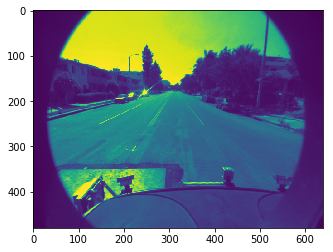

In [47]:
def calcTensor(dx, dy):
    #np.dot([a, b], [c, d]) = ac+bd  
    dx_dy = dx*dy
    return np.matrix([[dx**2, dx_dy], [dx_dy, dy**2]])

def calculateGradients(imgGrey):
    gradients = np.zeros((imgGrey.shape[0], imgGrey.shape[1], 2)) 
    for h in range(1, imgGrey.shape[0]-1):
        for w in range(1, imgGrey.shape[1]-1):
            gradients[h][w][0] = (imgGrey[h][w+1] - imgGrey[h] [w-1])/2
            gradients[h][w][1] = (imgGrey[h-1][w] - imgGrey[h+1][w])/2
    
    return gradients
                
def findCorners(image):
    imgGrey = color.rgb2gray(image)
    plt.imshow(imgGrey)
    gradients = calculateGradients(imgGrey)
    tensors = []
    for y in range(imgGrey.shape[0]):
        
        for x in range(imgGrey.shape[1]):
            dx, dy  = gradients[y][x]
            tensors[y][x] = calcTensor(dx, dy)
            
    

def trackLane():
    lane1 = io.imread('images/lane_detection/f00000.png')
    corners = findCorners(lane1)
    
print("I'm here")
trackLane()
